# K-Nearest Neighbors

**K_nearest Neighbors** is an supervised learning algorithm. Where the data is "trained" with data points corresponding to their classification.

Once a point is to be predicted, it takes into account the K nearest point to it to determine its classification.

In [1]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline

### The Dataset

Categorizing the telecommunications provider's customers.

The target field, called cuscat, has four possible values that correspond to the four customer groups, as follows:
* 1 - Basic Service
* 2 - E-Service
* 3 - Plus Service
* 4 - Total Service

In [2]:
# !wget -O teleCust1000t.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/teleCust1000t.csv

### Load Data from CSV file

In [3]:
df = pd.read_csv('teleCust1000t.csv')
df.head()

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
0,2,13,44,1,9,64.0,4,5,0.0,0,2,1
1,3,11,33,1,7,136.0,5,5,0.0,0,6,4
2,3,68,52,1,24,116.0,1,29,0.0,1,2,3
3,2,33,33,0,12,33.0,2,0,0.0,1,1,1
4,2,23,30,1,9,30.0,1,2,0.0,0,4,3


### Data Visualization and Analysis

In [4]:
df['custcat'].value_counts()

3    281
1    266
4    236
2    217
Name: custcat, dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f2453b95828>]],
      dtype=object)

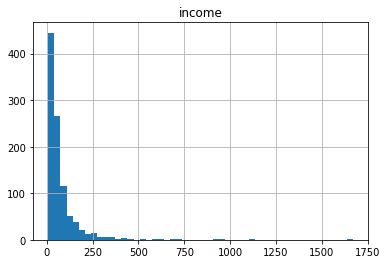

In [5]:
df.hist(column='income', bins=50)

### Feature Set

In [6]:
df.columns

Index(['region', 'tenure', 'age', 'marital', 'address', 'income', 'ed',
       'employ', 'retire', 'gender', 'reside', 'custcat'],
      dtype='object')

To use scikit-learn library, we have to convert the Pandas dataframe to a Numpy array

In [7]:
X = df[['region', 'tenure', 'age', 'marital', 'address', 'income', 'ed', 'employ', 'retire', 'gender', 'reside']]
X[0:5]

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside
0,2,13,44,1,9,64.0,4,5,0.0,0,2
1,3,11,33,1,7,136.0,5,5,0.0,0,6
2,3,68,52,1,24,116.0,1,29,0.0,1,2
3,2,33,33,0,12,33.0,2,0,0.0,1,1
4,2,23,30,1,9,30.0,1,2,0.0,0,4


What are our labels?

In [8]:
y = df['custcat'].values
y[0:5]

array([1, 4, 3, 1, 3])

### Normalize Data


In [9]:
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))
X[0:5]

/home/jupyterlab/conda/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)


array([[-0.02696767, -1.055125  ,  0.18450456,  1.0100505 , -0.25303431,
        -0.12650641,  1.0877526 , -0.5941226 , -0.22207644, -1.03459817,
        -0.23065004],
       [ 1.19883553, -1.14880563, -0.69181243,  1.0100505 , -0.4514148 ,
         0.54644972,  1.9062271 , -0.5941226 , -0.22207644, -1.03459817,
         2.55666158],
       [ 1.19883553,  1.52109247,  0.82182601,  1.0100505 ,  1.23481934,
         0.35951747, -1.36767088,  1.78752803, -0.22207644,  0.96655883,
        -0.23065004],
       [-0.02696767, -0.11831864, -0.69181243, -0.9900495 ,  0.04453642,
        -0.41625141, -0.54919639, -1.09029981, -0.22207644,  0.96655883,
        -0.92747794],
       [-0.02696767, -0.58672182, -0.93080797,  1.0100505 , -0.25303431,
        -0.44429125, -1.36767088, -0.89182893, -0.22207644, -1.03459817,
         1.16300577]])

### Train Test Split

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)
print('Train set: ', X_train.shape, y_train.shape)
print('Test set: ', X_test.shape, y_test.shape)

Train set:  (800, 11) (800,)
Test set:  (200, 11) (200,)


In [12]:
#train_test_split?

### Classification

K Nearest Neighbor

**Import Library**

In [13]:
from sklearn.neighbors import KNeighborsClassifier

**Training**

In [14]:
k = 4
neigh = KNeighborsClassifier(n_neighbors=k).fit(X_train,y_train)
neigh

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=4, p=2,
           weights='uniform')

**Predicting**

In [15]:
yhat = neigh.predict(X_test)

In [16]:
yhat[0:5]

array([1, 1, 3, 2, 4])

**Accuracy Evaluation**

In [17]:
from sklearn import metrics
print('Train set Accuracy: ', metrics.accuracy_score(y_train, neigh.predict(X_train)))
print('Test set Accuracy: ', metrics.accuracy_score(y_test, yhat))

Train set Accuracy:  0.5475
Test set Accuracy:  0.32


### What about other K?

In [27]:
Ks =10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfusionMx = [];
for n in range(1,Ks):
    
    # Train Model and Predict
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train, y_train)
    yhat = neigh.predict(X_test)
    
    # Store the scores into arrays
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)
    std_acc[n-1] = np.std(yhat==y_test) / np.sqrt(yhat.shape[0])

mean_acc

array([0.3  , 0.29 , 0.315, 0.32 , 0.315, 0.31 , 0.335, 0.325, 0.34 ])

### Plot model Accuracy for Different number of K

In [29]:
std_acc

array([0.0324037 , 0.03208582, 0.03284623, 0.03298485, 0.03284623,
       0.03270321, 0.03337477, 0.0331191 , 0.03349627])

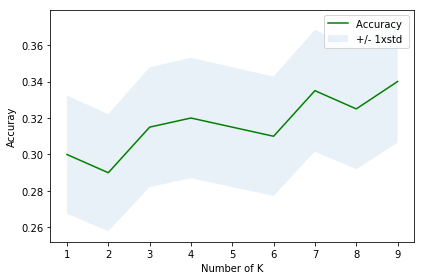

In [30]:
plt.plot(range(1,Ks), mean_acc, 'g')
plt.fill_between(range(1,Ks), mean_acc - 1 * std_acc, mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 1xstd'))
plt.ylabel('Accuray')
plt.xlabel('Number of K')
plt.tight_layout()
plt.show()

In [35]:
print('The best accuracy was with %0.2f with k = %d.'% (mean_acc.max(), mean_acc.argmax()+1))

The best accuracy was with 0.34 with k = 9.
